In [15]:
import numpy as np
import pandas as pd
import pickle
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import seaborn as sns
sns.set_context(context='paper',font_scale=1.5)
from gru.cc_utils import _get_clip_labels
%matplotlib inline

## Cross Validation Results

In [2]:
with open('results/clip_gru/roi_300_net_7_trainsize_100_kfold_5_batch_size_32_num_epochs_45_z_1_GSCV.pkl',"rb") as  f:
    results, params = pickle.load(f)

In [3]:
# params = [params[i] for i in (0,3,6)]
# results = dict((k, results[k]) for k in ('model00', 'model03', 'model06'))

In [6]:
results.keys()

dict_keys(['model00', 'model01', 'model02', 'model03', 'model04', 'model05', 'model06', 'model07', 'model08'])

In [4]:
params

[{'k_hidden': 16, 'k_layers': 1},
 {'k_hidden': 16, 'k_layers': 2},
 {'k_hidden': 16, 'k_layers': 3},
 {'k_hidden': 32, 'k_layers': 1},
 {'k_hidden': 32, 'k_layers': 2},
 {'k_hidden': 32, 'k_layers': 3},
 {'k_hidden': 64, 'k_layers': 1},
 {'k_hidden': 64, 'k_layers': 2},
 {'k_hidden': 64, 'k_layers': 3}]

,model,# hidden units,# layers,dataset,fold,Accuracy
0,model00,16,1,train,0,0.801088
1,model00,16,1,val,0,0.666042
2,model01,16,2,train,0,0.905861
3,model01,16,2,val,0,0.809972
4,model02,16,3,train,0,0.898757
...,...,...,...,...,...,...
85,model06,64,1,val,4,0.633540
86,model07,64,2,train,4,0.961544
87,model07,64,2,val,4,0.876308
88,model08,64,3,train,4,0.941120


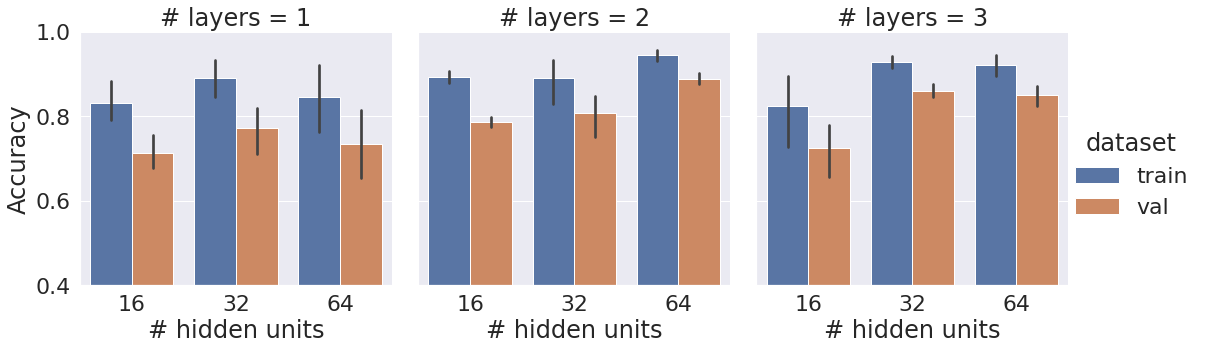

In [16]:
# rearrange all the needed variables for plotting
results_new = {}
for idx in range(9):
    train = results[f'model{idx:02d}']['train']
    val = results[f'model{idx:02d}']['val']
    k_hidden = params[idx]['k_hidden']
    k_layers = params[idx]['k_layers']
    results_new[(f'model{idx:02d}', k_hidden, k_layers, 'train')] = train
    results_new[(f'model{idx:02d}', k_hidden, k_layers, 'val')] = val
    
# create suitable dataframe
df = pd.DataFrame(results_new).T
df.index.set_names(['model', '# hidden units', '# layers', 'dataset'], inplace=True)
df.reset_index(inplace=True)
df = df.melt(id_vars=['model', '# hidden units', '# layers', 'dataset'], 
             var_name='fold', value_name='Accuracy')
display(df)

# plot
sns.set(rc={'figure.figsize':(21.7,9.27)}, font_scale=2)
g = sns.catplot(x='# hidden units', y='Accuracy', hue='dataset', 
                data=df, col='# layers', kind='bar', height=5, aspect=1)
g.set(ylim=(0.4, 1.0))
plt.savefig("figures/num_hidden_units_cv.png")

In [5]:
# df = pd.DataFrame.from_dict({(i,j): results[i][j] for i in results.keys()
#                              for j in ['train','val']}).T

# df.index.set_names(['model','dataset'],inplace=True) 
# df.reset_index(inplace=True)
# df= df.melt(id_vars = ['model','dataset'],var_name='fold',value_name='accuracy')
# df

,model,dataset,fold,accuracy
0,model00,train,0,0.801088
1,model00,val,0,0.666042
2,model01,train,0,0.905861
3,model01,val,0,0.809972
4,model02,train,0,0.898757
...,...,...,...,...
85,model06,val,4,0.633540
86,model07,train,4,0.961544
87,model07,val,4,0.876308
88,model08,train,4,0.941120


Best val accuray of: 0.889


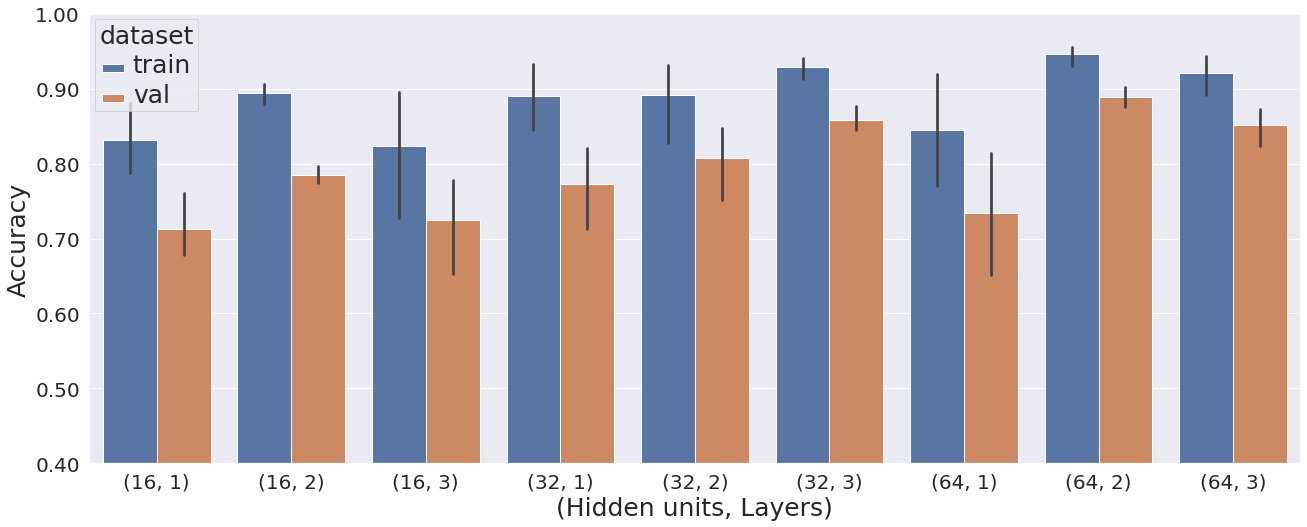

In [6]:
# sns.set(rc={'figure.figsize':(21.7,8.27)})
# ax = sns.barplot(x='model',y='accuracy',data=df,hue='dataset')
# ax.set_xticklabels([(d['k_hidden'],d['k_layers']) for d in params], fontsize=20)
# # ax.set_yticklabels([0.0, 0.2, 0.4, 0.6, 0.8, 1.0], fontsize=20)
# plt.setp(ax.get_yticklabels(), fontsize=20)
# plt.ylim(0.4, 1.0)
# ax.yaxis.set_major_formatter(mtick.FormatStrFormatter('%.2f')) # for formatting to 2 decimal places
# ax.set_xlabel('(Hidden units, Layers)', fontsize=25)
# ax.set_ylabel('Accuracy', fontsize=25)
# plt.setp(ax.get_legend().get_texts(), fontsize=25) # for legend text
# plt.setp(ax.get_legend().get_title(), fontsize=25) # for legend title
# plt.savefig("figures/num_hidden_units_cv.png")
# acc = df[df['dataset']=='val'].groupby('model').mean().sort_values(by='accuracy',ascending=False).iloc[0,0]
# opt_model = df[df['dataset']=='val'].groupby('model').mean().sort_values(by='accuracy',ascending=False).head(1).index.item()
# print('Best val accuray of: %.3f' %(acc))

In [7]:
df.groupby(['model','dataset'])['accuracy'].agg([np.mean, np.std])

mean       std
model   dataset                    
model00 train    0.832038  0.060174
        val      0.712261  0.054135
model01 train    0.893705  0.017579
        val      0.785444  0.015978
model02 train    0.823415  0.107504
        val      0.724196  0.082071
model03 train    0.889577  0.056504
        val      0.772378  0.068522
model04 train    0.891279  0.071715
        val      0.807680  0.064387
model05 train    0.928277  0.018039
        val      0.858665  0.020549
model06 train    0.845404  0.100741
        val      0.733592  0.107988
model07 train    0.945659  0.016386
        val      0.888969  0.016669
model08 train    0.921036  0.034131
        val      0.851096  0.032514

## Test Results

In [8]:
clip_y = _get_clip_labels()
k_class = len(np.unique(list(clip_y.values())))
print('number of classes = %d' %k_class)

clip_names = np.zeros(k_class).astype(str)
clip_names[0] = 'testretest'
for key, item in clip_y.items():
    if item!=0:
        clip_names[item] = key
        
res_path = 'results/clip_gru/'

number of classes = 15


In [9]:
with open('results/clip_gru/roi_300_net_7_trainsize_100_k_hidden_32_k_layers_1_batch_size_32_num_epochs_45_z_1.pkl',"rb") as  f:
    results, results_prob = pickle.load(f)

In [10]:
df = pd.DataFrame()
for dset in results_prob:
    for mov_i, movie in enumerate(clip_names):
        for t_prob in results_prob[dset]['t_prob'][mov_i]:
            tmp_df = pd.DataFrame(t_prob,columns=['probs'])
            tmp_df['acc'] = results_prob[dset]['acc']
            tmp_df['dset'] = dset
            tmp_df['movie'] =  movie
            tmp_df['time'] = np.arange(t_prob.shape[0])
            df = pd.concat([df,tmp_df],ignore_index=True)

KeyboardInterrupt: 

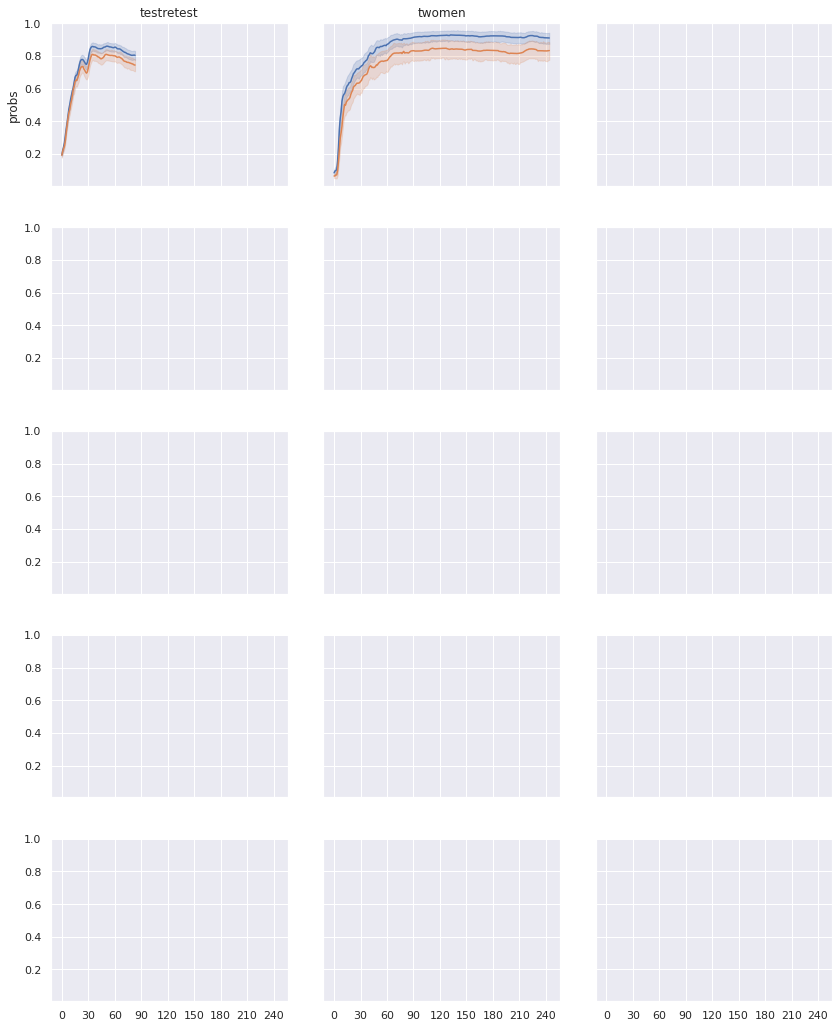

In [11]:
fig, axes = plt.subplots(ncols=3,nrows=5,figsize=(14,18),sharey=True,sharex=True)
axes = axes.flatten()

fig.subplots_adjust(hspace=0.25,wspace=0.15)

for mov_i, movie in enumerate(clip_names):
    movie_df = df[df['movie']==movie]
    sns.lineplot(x='time',y='probs',hue='dset',data=movie_df,ax=axes[mov_i],legend=False)
    axes[mov_i].set_title(movie)
    axes[mov_i].set_xlabel('Timepoints')
    axes[mov_i].set_xticks(np.arange(0,260,30))
    
fig.legend(['train','test'],bbox_to_anchor=[1,0.8])

In [ ]:
train = pd.Series(results['train'],name='acc',index=np.arange(100)).to_frame()
test = pd.Series(results['test'],name='acc',index=np.arange(100,176)).to_frame()
result_table = pd.concat([train,test],axis=0)

result_table['dset'] = 'train'
result_table.loc[100:,'dset'] = 'test'

In [ ]:
#plt.figure(figsize=(8,6))
sns.barplot(x='dset',y='acc',data=result_table,capsize=0.10)
plt.xlabel('')
_=plt.ylabel('Accuracy')
print('Mean train accuracy: %.2f'%train.mean().item())
print('Mean test accuracy: %.2f'%test.mean().item())